In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 2 - Bayes estimator and Bayes risk

Question 1 (M) : Propose a supervised learning setting :
- input space X
- output space Y
- a random variable (X, Y) with a joint distribution.
- a loss function l(x, y)

l = X × Y → R+ <br>
(x, y) → l(x, y)


Compute the Bayes predictor f* : X → Y and the Bayes risk associated with this
setting. Remark : you have to use a setting different than the settings seen during
the course, in terms of input space X and output space Y. However, you can use any
classical loss function l (square loss, "0-1" loss, etc).

On se propose d'étudier le cas des prix des appatements à Paris en fonction de leur surface. <br><br>
On suppose que la surface est une variable aléatoire continue entre 9 et 100 et que le prix est suit une variable aléatoire Y = 1000*X + epsilon (epsilon étant une variable gaussienne centrée et d'écart type sigma=4000).<br><br>

On suppose que la fonction de perte est la fonction de perte quadratique.



In [12]:
# instantiate a Pseudo-random number generator (PRNG)
rng = np.random.default_rng()
n_samples = int(1e6)
X = rng.uniform(low=9, high=100, size=n_samples)
y = 1000 * X + rng.normal(loc=0, scale=4000, size=n_samples)

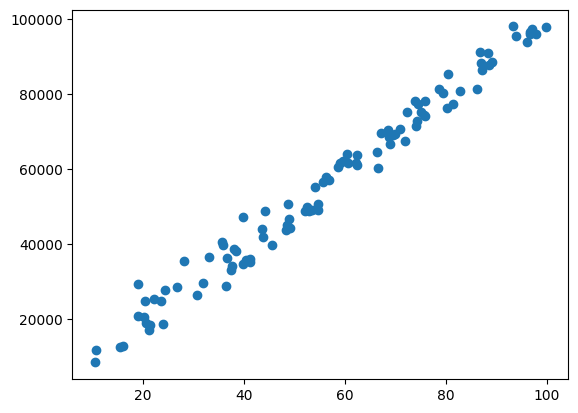

In [13]:
plt.plot(X[:100], y[:100], 'o')

Here the the Bayes predictor f* : X → Y is the function that minimizes the Bayes risk associated with this setting. <br><br>
f* = 1000*x <br>
R* = E[l(x, f*(x))] = E[(1000*x + eps - 1000*x)^2]<br>
R* = E[eps^2] = 4000**2 = 16 000 000 puisque Var(eps) = E[eps^2] - E[eps]^2 = E[eps^2] = 16 000 000 

Question 2 (C) : propose an estimator ˜f : X → Y, different than the Bayes estimator
and run a simulation that gives a statistical approximation of its generalization
error (risque réel) by computing its empirical risk on a test set. Perform the same
simulation also for f*, and verify that the generalization error is smaller for f∗ than
for ˜f, and that your computation in question 1 was correct (the test error for f∗
should be close to the Bayes risk if there is a sufficiently large number of samples).

In [39]:
y_pred_bayes = 1000 * X
y_pred_bad = 1200 * X + rng.normal(loc=100, scale=1000, size=n_samples)
risk_bayes = 4000**2

# compute the empirical risk for the Bayes estimator
empirical_risk_bayes = np.mean((y - y_pred_bayes)**2)

# empirical risk bad estimator
empirical_risk_bad_estimator = np.mean((y - y_pred_bad)**2)

print(f"Empirical risk for the Bayes estimator: {empirical_risk_bayes}")
print(f"Empirical risk for the bad estimator: {empirical_risk_bad_estimator}")
print(f"Difference between empirical risk for bad estimator and bayes risk: {abs(empirical_risk_bad_estimator - risk_bayes)}")
print(f"Difference between empirical risk for bayes estimator and bayes risk: {abs(empirical_risk_bayes - risk_bayes)}")


Empirical risk for the Bayes estimator: 15998345.490535075
Empirical risk for the bad estimator: 165492384.40183824
Difference between empirical risk for bad estimator and bayes risk: 149492384.40183824
Difference between empirical risk for bayes estimator and bayes risk: 1654.509464925155


We can conclude that the Bayes estimator f* = 1000*x is the best estimator in terms of generalization error.


## 3 - Bayes risk with Absolute Loss

### Question 1 (M + C)

In [ ]:
# TODO

### Question 2 (M)

On donne
$g(z) = \int_{y\in\mathbb{R}}|y - z|p_{Y|X=x}(y)dy$ <br>

$g(z) = \int_{-\infty}^z(z-y)p_{Y|X=x}(y)dy + \int_{z}^{+\infty}(y-z)p_{Y|X=x}(y)dy$ <br>

</br>Pour trouver le minimum de $g$, on dérive par rapport à $z$ et on cherche $z$ tel que $\frac{\partial g(z)}{\partial z} = 0$.<br>

$\frac{\partial g(z)}{\partial z} = \int_{-\infty}^z p_{Y|X=x}(y)dy - \int_{z}^{+\infty} p_{Y|X=x}(y)dy$ <br>

$\frac{\partial g(z)}{\partial z} = P(Y \leq z\ |\ X=x) - P(Y \geq z\ |\ X=x)$ <br>

Nous avons donc $\frac{\partial g(z)}{\partial z} = 0$ si $P(Y \leq z\ |\ X=x) = P(Y \geq z\ |\ X=x)$ <br>

Par conséquent, $g(z)$ est minimum si $z$ est la médiane de $Y$ sachant $X=x$, soit $z = Med(Y\ |\ X=x)$.<br>

Enfin, l'estimateur de Bayes associé à l'`absolute loss` est donc $$f^*(x) = Med(Y\ |\ X=x)$$

## 5 - Regression on a given dataset

#### Loading the dataset

In [5]:
# Training - Load the raw data and the associated labels
X_train = np.load('./data/regression/X_train.npy')
y_train = np.load('./data/regression/y_train.npy')

# Testing - Similarly, the raw data and the associated labels
X_test = np.load('./data/regression/X_test.npy')
y_test = np.load('./data/regression/y_test.npy')

#### Splitting dataset into a training set and a test set

In [ ]:
# TODO